
# Modelos de clasificación
## Regresión logistica - Evaluación de modelos de clasificación

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import datasets

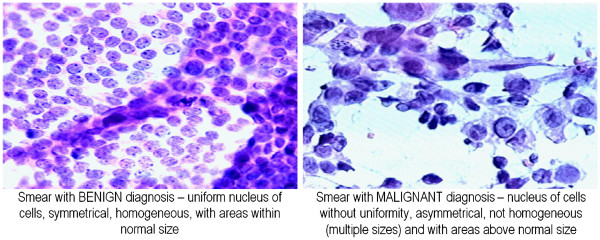

In [2]:
from IPython.display import Image

Image("imagen/breast_cancer.jpeg")

In [3]:
cancer_datos = datasets.load_breast_cancer()

In [4]:
cancer_datos = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer_datos = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target
cancer_df["objetivo"] = cancer_df["objetivo"].replace({0:1, 1:0})

In [6]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [7]:
cancer_df["objetivo"].value_counts(True)

0    0.627417
1    0.372583
Name: objetivo, dtype: float64

In [8]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


En primer lugar creamos un modelo simple de Regresión Logística.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
cancer_datos.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
X = cancer_df[cancer_datos.feature_names]
y = cancer_df["objetivo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape, X.shape, X_test.shape

((398, 30), (569, 30), (171, 30))

In [13]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = modelo.predict_proba(X_test)

C:\Users\Jhon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(clases_reales, predicciones)[:10]

[(0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0)]

**Conceptos de Clasificación binaria**

En clasificación binaria, tenemos el concepto de casos negativos (clase 0, en el caso del dataset de cancer de mama serian los casos donde el cancer es benigno) y casos positivos (clase 1, en el caso del dataset de cancer de mama serían los casos donde el cancer es maligno). Positivo y negativo no significa que el resultado sea bueno o malo, simplemente que la detección de un cancer maligno se active o no.

- Casos positivos: Casos donde la clase es 1 (cánceres malignos)
- Casos negativos: Casos donde la clase es 0 (cánceres benignos)

Esto nos lleva a computar 4 tipos de observaciones, explicados como ejemplos del dataset del cancer de mama.

- Verdaderos Positivos(True positives), serían las imágenes con un cancer maligno que se detectan como cancer maligno.
- Falsos Positivos (False positives), serían los cánceres benignos que se detectan como un cancer maligno.
- Verdaderos Negativos(True Negatives), serían los canceres benignos que se clasifican como cánceres benignos.
- Falsos Negativos(False Negatives), serían los canceres malignos que se clasifican como cánceres benignos.

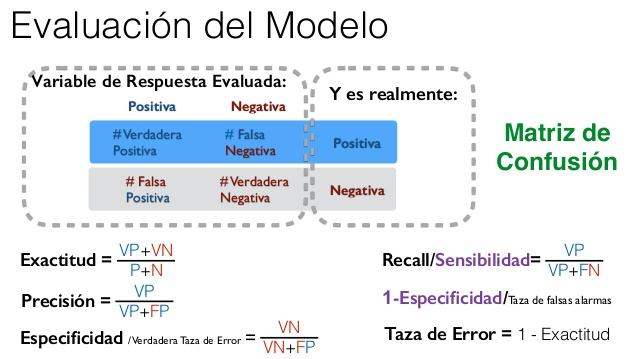

In [15]:
Image("imagen/matriz_metric.jpg")

In [16]:
def VP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==1])

def VN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==0])
    
def FP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==1])

def FN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==0])


print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(clases_reales, predicciones),
    VN(clases_reales, predicciones),
    FP(clases_reales, predicciones),
    FN(clases_reales, predicciones)    
))    


Verdaderos Positivos: 59
Verdaderos Negativos: 107
Falsos Positivos: 1
Falsos Negativos: 4



### Ratios de clasificación

**Exactitud (Accuracy)**

La exactitud es una medida general de como se comporta el modelo, mide simplemente el porcentaje de casos que se han clasificado correctamente.

$$Exactitud=\frac{Número~de~observaciones~correctamente~clasificadas}{Número~de~observaciones~totales}= \frac{VP+VN}{VP+VN+FP+FN}$$

In [17]:
def exactitud(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    vn = VN(clases_reales, predicciones)
    return (vp+vn) / len(clases_reales)

exactitud(clases_reales, predicciones)

0.9707602339181286

In [18]:
from sklearn import metrics
metrics.accuracy_score(clases_reales, predicciones)

0.9707602339181286

**Precisión (Precission)**

La precisión indica la habilidad del modelo para clasificar como positivos los casos que son positivos.

$$Precisión=\frac{Número~de~observaciones~positivas~correctamente~clasificadas}{Número~de~observaciones~clasificadas~como~positivas}= \frac{VP}{VP+FP}$$

In [19]:
def precision(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vp / (vp+fp)

precision(clases_reales, predicciones)

0.9833333333333333

In [20]:
metrics.average_precision_score(clases_reales, predicciones)

0.944291283764968

**Exhaustividad o sensibilidad(Recall o True Positive Rate)**

La sensibilidad nos da una medida de la habilidad del modelo para encontrar todos los casos positivos. La sensibilidad se mide en función de una clase.

$$Sensibilidad=\frac{Número~de~observaciones~positivas~clasificadas~como~positivas}{Número~de~observaciones~positivas~totales}= \frac{VP}{VP+FN}$$

In [21]:
def sensibilidad(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fn = FN(clases_reales, predicciones)
    return vp / (vp+fn)

sensibilidad(clases_reales, predicciones)

0.9365079365079365

In [22]:
metrics.recall_score(clases_reales, predicciones)

0.9365079365079365

**Especificidad**

La especificidad nos da una medida de la habilidad del modelo para encontrar todos los casos negativos. La especificidad se mide en función de una clase.

$$Especificidad=\frac{Número~de~observaciones~negativas~clasificadas~como~negativas}{Número~de~observaciones~negativas~totales}= \frac{VN}{VN+FP}$$

In [23]:
def especificidad(clases_reales, predicciones):
    vn = VN(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vn / (vn+fp)

especificidad(clases_reales, predicciones)

0.9907407407407407

** Matriz de confusion **

La matriz de confusión es una forma muy sencilla de comparar como ha clasificado cada observación el modelo.

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clases_reales, predicciones)

array([[107,   1],
       [  4,  59]], dtype=int64)

**Puntuación F1 (F1 score)**

La puntuación F1 es una media ponderada entre la sensibilidad (que intenta obtener cuantos mas verdaderos positivos independientemente de los falsos positivos) y la precisión (que intenta obtener solo verdaderos positivos que sean casos claros para limitar los falsos positivos).

La puntuación F1 se define como la media harmónica de la precisión y la sensibilidad:

$$F1=2*\frac{1}{\frac{1}{precisión}+\frac{1}{sensibilidad}}=2*\frac{precisión*sensibilidad}{precisión+sensibilidad}$$

In [25]:
def puntuacion_f1(clases_reales, predicciones):
    precision_preds = precision(clases_reales, predicciones)
    sensibilidad_preds = sensibilidad(clases_reales, predicciones)
    return 2*(precision_preds*sensibilidad_preds)/(precision_preds+sensibilidad_preds)

puntuacion_f1(clases_reales, predicciones)

0.9593495934959351

In [26]:
metrics.f1_score(clases_reales, predicciones)

0.9593495934959351

** Ratio de Falsos Positivos (Ratio de Falsa Alarma o FPR) **

El ratio de falsos positivos nos da una medida de las probabilidades de nuestro modelo de asignar una clase positiva a un caso negativo.

Se define como:

$$FPR=\frac{Número~de~observaciones~negativas~clasificadas~como~positivas}{Número~de~observaciones~totales}= \frac{FP}{FP+TN}$$

In [27]:
def fpr(clases_reales, predicciones):
    return (FP(clases_reales, predicciones) / (
             FP(clases_reales, predicciones) + VN(clases_reales, predicciones)
             )
           )
fpr(clases_reales, predicciones)

0.009259259259259259

**¿Cómo clasifica un modelo?**

Un modelo como la regresión lineal funciona prediciendo distancias a una "linea de decision" que se convierten en probabilidades para cada clase. Pero a la hora de la verdad al modelo le suele interesar sólo saber que clase predice el modelo. En general esto se hace decidiendo un umbral *(threshold)* y clasificando los casos con menor probabilidad como clase negativa y  mayor probabilidad como clase positiva.

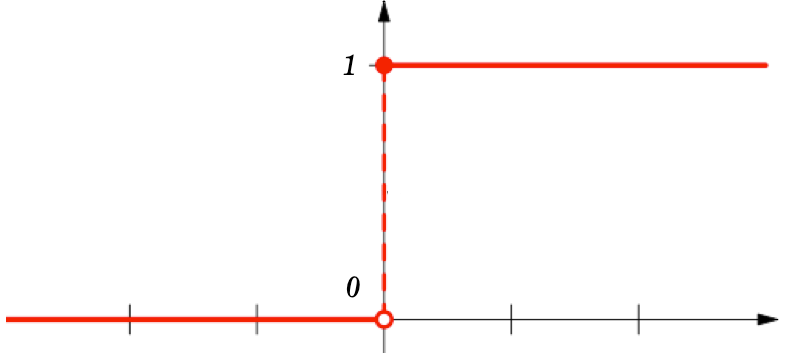

In [28]:
Image("imagen/threshold.png")

In [29]:
df = pd.DataFrame({"clase_real":clases_reales,
                   "clase_pred": predicciones,
                   "probabilidades_0":modelo.predict_proba(X_test)[:,0],
                    "probabilidades_1":modelo.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1

In [30]:
df.sample(10)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
320,0,0,9.977923e-01,0.002208,1.0
84,0,0,9.530946e-01,0.046905,1.0
181,1,1,5.853530e-09,1.000000,1.0
290,0,0,5.618769e-01,0.438123,1.0
228,0,0,9.543172e-01,0.045683,1.0
238,0,1,2.186520e-01,0.781348,1.0
530,0,0,6.934016e-01,0.306598,1.0
68,0,0,9.875971e-01,0.012403,1.0
29,1,1,4.482372e-03,0.995518,1.0
210,1,1,5.093749e-08,1.000000,1.0


Como el modelo no tiene ningún motivo para elegir un umbral determinado (sólo sabe probabilidades) elige 0.5 por defecto.

In [31]:
df.query("probabilidades_1>0.5 & clase_pred==0")

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas


In [32]:
df.query("probabilidades_0>0.5 & clase_pred==1")

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas


**Curva Precisión (Precission-Recall Curve)**

In [33]:
def probabilidades_a_clases(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

In [34]:
predicciones_probabilidades[:10]

array([[8.69721519e-01, 1.30278481e-01],
       [4.90651830e-09, 9.99999995e-01],
       [6.86488817e-03, 9.93135112e-01],
       [9.96638222e-01, 3.36177834e-03],
       [9.98646083e-01, 1.35391724e-03],
       [5.64527536e-10, 9.99999999e-01],
       [9.23261467e-13, 1.00000000e+00],
       [4.48237164e-03, 9.95517628e-01],
       [9.96154446e-01, 3.84555422e-03],
       [9.81523312e-01, 1.84766882e-02]])

In [35]:
probabilidades_a_clases(predicciones_probabilidades, umbral=0.90)[:10]

array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0.])

In [36]:
from ipywidgets import widgets, fixed, interact
@interact(umbral=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.01))
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral) 
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Ratio de Alarma: {:.3f}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        fpr_umbral
    ))

interactive(children=(FloatSlider(value=0.01, description='umbral', max=0.99, min=0.01, step=0.01), Output()),…

In [37]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral, fpr_umbral


rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []
fpr_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral, fpr_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)
    fpr_umbrales.append(fpr_umbral)

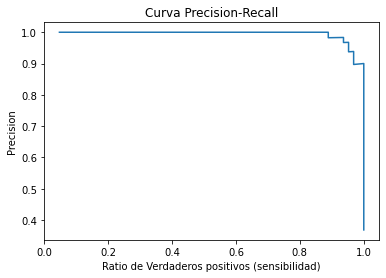

In [38]:
plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");

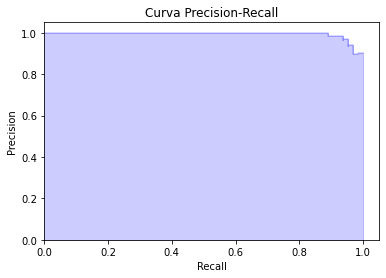

In [39]:
def grafica_precision_recall(clases_reales, predicciones_probabilidades):
    precision_, recall_, _ = metrics.precision_recall_curve(
        clases_reales, predicciones_probabilidades[:,1])

    plt.step(recall_, precision_, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall_, precision_, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Curva Precision-Recall');
    plt.show()


grafica_precision_recall(clases_reales, predicciones_probabilidades)

**Area bajo la curva (Area Under the Curve, ROC-AUC)**

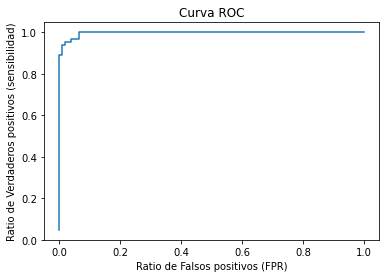

In [40]:
plt.plot(fpr_umbrales, sensibilidad_umbrales);
plt.xlabel("Ratio de Falsos positivos (FPR)")
plt.ylabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva ROC");

In [41]:
metrics.roc_auc_score(clases_reales, predicciones)

0.9636243386243386

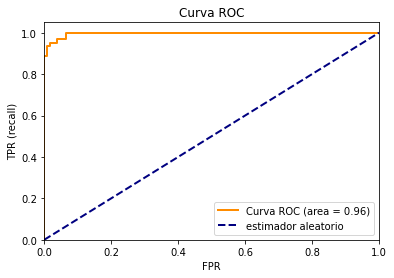

In [42]:
def grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades):
    fpr, tpr, _ = metrics.roc_curve(clases_reales, predicciones_probabilidades[:,1])
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    plt.figure()

    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="estimador aleatorio")
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR (recall)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show();

grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades)

In [43]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud, 
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))
    
evaluar_modelo(clases_reales, predicciones, predicciones_probabilidades)


    Exactitud: 0.971
    Precisión: 0.944
    Sensibilidad: 0.937
    Area bajo curva (AUC): 0.964
    Puntuación F1: 0.959
    


<hr>
<hr>
<hr>

In [44]:
cancer_df.objetivo.value_counts(True)

0    0.627417
1    0.372583
Name: objetivo, dtype: float64

# Evaluación en Dataset imbalanceado

Ahora vamos a usar un dataset con clases no balanceadas

https://www.kaggle.com/c/GiveMeSomeCredit/data


>Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years. 

In [45]:
creditos_df = pd.read_csv("data/datos_creditos.csv")

In [46]:
creditos_df.head()

,impago_en_2_anos,deuda_credito,edad,n_veces_pagos_retrasados_30_59_dias,ratio_deuda_mensual_salario,salario,n_lineas_credito_y_prestamos,n_veces_pagos_retrasados_90_dias,n_hipotecas,n_veces_pagos_retrasados_60_89_dias,numero_personas_dependientes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [47]:
creditos_df.shape

(150000, 11)

In [48]:
creditos_df.groupby("impago_en_2_anos").size()

impago_en_2_anos
0    139974
1     10026
dtype: int64

In [49]:
creditos_df["impago_en_2_anos"].value_counts(True)

0    0.93316
1    0.06684
Name: impago_en_2_anos, dtype: float64

In [50]:
variable_objetivo = "impago_en_2_anos"

In [51]:
X = creditos_df.drop(variable_objetivo, axis=1)
y = creditos_df[variable_objetivo]

X_train_credito, X_test_credito, y_train_credito, y_test_credito = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [52]:
X_train_credito.head()

,deuda_credito,edad,n_veces_pagos_retrasados_30_59_dias,ratio_deuda_mensual_salario,salario,n_lineas_credito_y_prestamos,n_veces_pagos_retrasados_90_dias,n_hipotecas,n_veces_pagos_retrasados_60_89_dias,numero_personas_dependientes
27822,0.186299,55,0,0.450637,4000.0,5,0,0,0,0.0
85202,0.760346,55,1,0.149838,9883.0,9,0,0,0,0.0
42217,0.101500,39,0,0.175026,7735.0,5,0,1,0,0.0
119958,0.009897,64,0,0.713701,4400.0,14,0,2,0,1.0
37678,0.000000,64,0,0.000000,7500.0,3,0,0,0,0.0


In [53]:
y.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: impago_en_2_anos, dtype: float64

In [54]:
modelo = LogisticRegression()
modelo.fit(X_train_credito, y_train_credito)

predicciones_creditos = modelo.predict(X_test_credito)
clases_reales_creditos = y_test_credito
predicciones_probabilidades_creditos = modelo.predict_proba(X_test_credito)

C:\Users\Jhon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
predicciones_creditos

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
evaluar_modelo(clases_reales_creditos, predicciones_creditos, predicciones_probabilidades_creditos)


    Exactitud: 0.934
    Precisión: 0.072
    Sensibilidad: 0.014
    Area bajo curva (AUC): 0.506
    Puntuación F1: 0.027
    


In [57]:
confusion_matrix(clases_reales_creditos, predicciones_creditos)

array([[41976,    44],
       [ 2939,    41]], dtype=int64)

In [58]:
#len(creditos_df[creditos_df[variable_objetivo]==1])
creditos_df.impago_en_2_anos.sum()

10026

In [59]:
predicciones_creditos.sum()

85

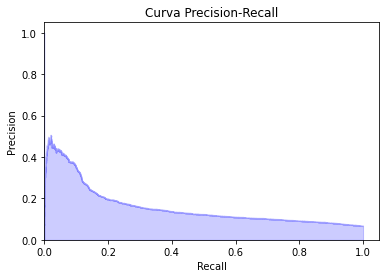

In [60]:
grafica_precision_recall(clases_reales_creditos, predicciones_probabilidades_creditos)

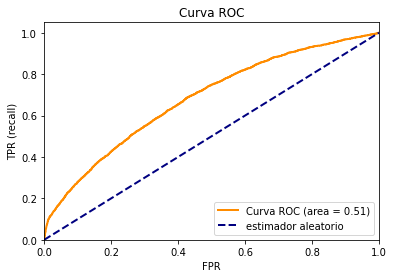

In [61]:
grafica_curva_auc(clases_reales_creditos, predicciones_creditos, predicciones_probabilidades_creditos)

# Tratamiento para un Dataset imbalanceado

In [62]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [63]:
creditos_df = pd.read_csv("data/datos_creditos.csv")

variable_objetivo = "impago_en_2_anos"

X = creditos_df.drop(variable_objetivo, axis=1)
y = creditos_df[variable_objetivo]

X_train_credito, X_test_credito, y_train_credito, y_test_credito = train_test_split(X, y, test_size=0.3, random_state=666)

In [64]:
modelo = LogisticRegression()
modelo.fit(X_train_credito, y_train_credito)

predicciones = modelo.predict(X_test_credito)
clases_reales = y_test_credito
predicciones_probabilidades = modelo.predict_proba(X_test_credito)

C:\Users\Jhon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Matriz de confusión**

In [65]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test_credito, y_pred=predicciones)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[41874    46]
 [ 3039    41]]


<ipython-input-66-be047c04fbfc>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-66-be047c04fbfc>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


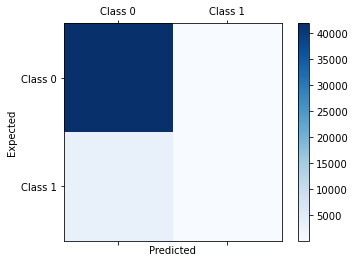

In [66]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Resampling

Una técnica ampliamente adoptada para tratar con conjuntos de datos altamente **desbalanceados** es el remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo - *undersampling*) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo - *oversampling*).

![revit](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

A pesar de las ventajas de conseguir el equilibrio en la variable objetivo, estas técnicas también tienen sus puntos débiles (nada es gratis). La implementación más simple del muestreo excesivo es duplicar registros aleatorios de la clase minoritaria, lo que puede causar un ajuste excesivo. En el submuestreo, la técnica más simple consiste en eliminar registros aleatorios de la clase mayoritaria, lo que puede causar la pérdida de información.

Implementemos un ejemplo básico, que utiliza el método `DataFrame.sample` para obtener muestras aleatorias de cada clase:

## Undersampling

In [67]:
target = "impago_en_2_anos"

In [68]:
creditos_df.groupby(target).size()

impago_en_2_anos
0    139974
1     10026
dtype: int64

In [69]:
# Class count
count_class_0, count_class_1 = creditos_df[target].value_counts()

# Divide by class
df_class_0 = creditos_df[creditos_df[target] == 0]
df_class_1 = creditos_df[creditos_df[target] == 1]

Random under-sampling:
1    10026
0    10026
Name: impago_en_2_anos, dtype: int64


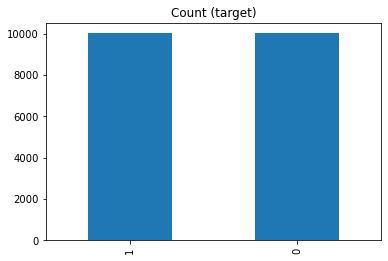

In [70]:
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under[target].value_counts())

df_train_under[target].value_counts().plot(kind='bar', title='Count (target)');

## Undersampling

Random over-sampling:
1    139974
0    139974
Name: impago_en_2_anos, dtype: int64


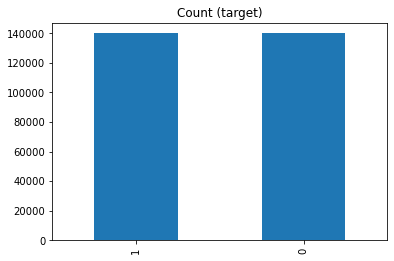

In [71]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over[target].value_counts())

df_train_over[target].value_counts().plot(kind='bar', title='Count (target)');

## Python imbalanced-learn module

Para los datos imbalanceados se han propuesto varias técnicas de reajuste más sofisticadas.

Por ejemplo, podemos agrupar los registros de la clase mayoritaria y realizar el submuestreo eliminando los registros de cada grupo, buscando preservar la información. En el muestreo excesivo, en lugar de crear copias exactas de los registros de la clase minoritaria, podemos introducir pequeñas variaciones en esas copias, creando muestras sintéticas más diversas.

Apliquemos algunas de estas técnicas de remuestreo, utilizando la biblioteca de Python [imbalanced-learn](https://imbalanced-learn.org/en/stable/index.html). Es compatible con scikit-learn y forma parte de los proyectos de scikit-learn-contrib.

Under con **imblearn**

In [72]:
X = creditos_df.drop(target, axis = 1)
y = creditos_df[target]

In [75]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - imbalaced-learn

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [78]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X, y)
print(sorted(Counter(y_rus).items()))

[(0, 10026), (1, 10026)]


In [79]:
X_rus.shape, y_rus.shape, X.shape

((20052, 10), (20052,), (150000, 10))

In [80]:
negativos = (y_rus==0).sum()
positivos = (y_rus==1).sum()
print("positivos {} y negativos {}".format(negativos, positivos))

positivos 10026 y negativos 10026


Over con **imblearn**

In [83]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'nuevas observaciones aleatorias')

129948 nuevas observaciones aleatorias


In [84]:
negativos = (y_ros==0).sum()
positivos = (y_ros==1).sum()
print("positivos {} y negativos {}".format(negativos, positivos))

positivos 139974 y negativos 139974


In [85]:
X = X_ros
y = y_ros

X_train_credito, X_test_credito, y_train_credito, y_test_credito = train_test_split(X, y, test_size=0.3, random_state=666)

In [86]:
modelo = LogisticRegression()
modelo.fit(X_train_credito, y_train_credito)

predicciones = modelo.predict(X_test_credito)
clases_reales = y_test_credito
predicciones_probabilidades = modelo.predict_proba(X_test_credito)

In [87]:
evaluar_modelo(clases_reales, predicciones, predicciones_probabilidades)


    Exactitud: 0.728
    Precisión: 0.693
    Sensibilidad: 0.568
    Area bajo curva (AUC): 0.729
    Puntuación F1: 0.677
    


## Under-sampling: Cluster Centroids

Esta técnica realiza un submuestreo generando centroides basados en métodos de agrupamiento. Los datos se agruparán previamente por similitud, a fin de preservar la información.

En este ejemplo, probaremos el {0: 1000} para el parámetro **ratio**, para preservar 10 elementos de la clase mayoritaria (0) y toda la clase minoritaria (1).

In [100]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_cc, y_cc = cc.fit_resample(X, y)

MemoryError: Unable to allocate 146. GiB for an array with shape (139974, 139974) and data type float64

In [ ]:
negativos = (y_cc==0).sum()
positivos = (y_cc==1).sum()
print("positivos {} y negativos {}".format(negativos, positivos))

## Over-sampling: SMOTE

**SMOTE** (técnica de sobremuestreo de minorías sintéticas) consiste en sintetizar elementos para la clase minoritaria, basados en aquellos que ya existen. Funciona de forma aleatoria al dibujar un punto de la clase minoritaria y calcular los vecinos más cercanos a k para este punto. Los puntos sintéticos se añaden entre el punto elegido y sus vecinos.

![revit](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

En fucnión a la clase minoritaria **ratio='minority'**

In [ ]:
from imblearn.over_sampling import SMOTE

smote_enn = SMOTE(random_state=0, )
X_sm, y_sm = smote_enn.fit_resample(X, y)


In [ ]:
negativos = (y_sm==0).sum()
positivos = (y_sm==1).sum()
print("positivos {} y negativos {}".format(negativos, positivos))

In [ ]:
creditos_df.groupby(target).size()

In [ ]:
variable_objetivo = "impago_en_2_anos"

X = X_sm
y = y_sm

X_train_credito, X_test_credito, y_train_credito, y_test_credito = train_test_split(X, y, test_size=0.3, random_state=666)

In [ ]:
modelo = LogisticRegression()
modelo.fit(X_train_credito, y_train_credito)

predicciones = modelo.predict(X_test_credito)
clases_reales = y_test_credito
predicciones_probabilidades = modelo.predict_proba(X_test_credito)

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test_credito, y_pred=predicciones)
print('Confusion matrix:\n', conf_mat)

In [ ]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
evaluar_modelo(clases_reales, predicciones, predicciones_probabilidades)

## Over-sampling followed by under-sampling

Ahora, haremos una combinación de muestreo excesivo y submuestreo, utilizando las técnicas de enlaces SMOTE y Tomek:

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

In [ ]:
negativos = (y_smt==0).sum()
positivos = (y_smt==1).sum()
print("positivos {} y negativos {}".format(negativos, positivos))

Recommended reading
The imbalanced-learn documentation:

http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html

The imbalanced-learn GitHub:

https://github.com/scikit-learn-contrib/imbalanced-learn

Comparison of the combination of over- and under-sampling algorithms:

http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/combine/plot_comparison_combine.html

Chawla, Nitesh V., et al. "SMOTE: synthetic minority over-sampling technique." Journal of artificial intelligence research 16 (2002):
https://www.jair.org/media/953/live-953-2037-jair.pdf